# LSTM Stock Prediction Model
By Joshua Jenkins

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.utils import plot_model

In [2]:
#Get the Dataset
df=pd.read_csv("MSFT_5yr.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df["Date"] = pd.to_datetime(df.index,format='%Y-%m-%d')
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2018-09-26,114.470001,115.059998,113.739998,113.980003,107.988243,19352000,2018-09-26
2018-09-27,114.779999,114.910004,114.199997,114.410004,108.395660,19091300,2018-09-27
2018-09-28,114.190002,114.570000,113.680000,114.370003,108.357750,21647800,2018-09-28
2018-10-01,114.750000,115.680000,114.730003,115.610001,109.532555,18883100,2018-10-01
2018-10-02,115.300003,115.839996,114.440002,115.150002,109.096733,20787200,2018-10-02


In [3]:
#Print the shape of Dataframe and check for null values
print("Dataframe Shape:",df.shape)
print("Null Values (if any):",df.isnull().values.any())


Dataframe Shape: (1257, 7)
Null Values (if any): False


<Axes: title={'center': 'Microsoft Stock Price'}, xlabel='Date', ylabel='Price (USD)'>

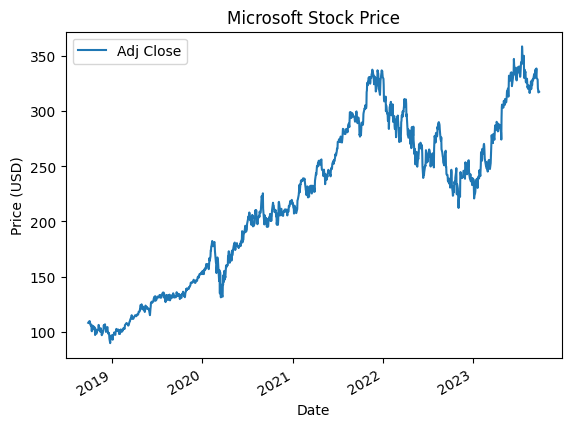

In [4]:
#Plot the closing price of the stock
df.plot(x='Date',y='Adj Close', xlabel = 'Date', ylabel = 'Price (USD)', title = 'Microsoft Stock Price')

In [5]:
#Set target variable as the closing price
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the features
features = ['Open','High','Low','Volume']

In [6]:
#Setting up scaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform = pd.DataFrame(data=feature_transform, columns=features, index=df.index)
feature_transform.head()
feature_transform

,Open,High,Low,Volume
Date,,,,
2018-09-26,0.072503,0.063576,0.076524,0.101345
2018-09-27,0.073666,0.063019,0.078304,0.098795
2018-09-28,0.071453,0.061754,0.076292,0.123797
2018-10-01,0.073553,0.065883,0.080354,0.096759
2018-10-02,0.075616,0.066478,0.079232,0.115381
...,...,...,...,...
2023-09-19,0.866547,0.860906,0.891945,0.073511
2023-09-20,0.879074,0.861649,0.876470,0.121731
2023-09-21,0.840629,0.845876,0.855153,0.259555


In [7]:
#Splitting to train and test set
timesplit = TimeSeriesSplit(n_splits=10)#?
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
    Y_train, Y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [8]:
#Data Proessing for LSTM
trainX = np.array(X_train)
testX = np.array(X_test)
X_train = trainX.reshape(trainX.shape[0], 1, trainX.shape[1])
X_test = testX.reshape(testX.shape[0], 1, testX.shape[1])


In [9]:
#LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes = True, show_layer_names =True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:
#Training the Model
lstm.fit(X_train, Y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
143/143 [==============================] - 2s 2ms/step - loss: 47686.0078
Epoch 2/100
143/143 [==============================] - 0s 2ms/step - loss: 46439.7148
Epoch 3/100
143/143 [==============================] - 0s 2ms/step - loss: 43738.9180
Epoch 4/100
143/143 [==============================] - 0s 2ms/step - loss: 39561.3555
Epoch 5/100
143/143 [==============================] - 0s 3ms/step - loss: 34413.1328
Epoch 6/100
143/143 [==============================] - 0s 3ms/step - loss: 28856.5898
Epoch 7/100
143/143 [==============================] - 0s 3ms/step - loss: 23334.2129
Epoch 8/100
143/143 [==============================] - 0s 2ms/step - loss: 18168.2715
Epoch 9/100
143/143 [==============================] - 0s 2ms/step - loss: 13582.3857
Epoch 10/100
143/143 [==============================] - 0s 2ms/step - loss: 9713.6768
Epoch 11/100
143/143 [==============================] - 0s 2ms/step - loss: 6619.1826
Epoch 12/100
143/143 [==============================] 

In [11]:
#Prediction
Y_pred = lstm.predict(X_test)
Y_pred

4/4 [==============================] - 0s 3ms/step


array([[286.40903],
       [287.3801 ],
       [290.216  ],
       [291.2597 ],
       [287.45505],
       [287.3979 ],
       [285.70834],
       [282.53934],
       [278.64575],
       [295.97684],
       [299.25476],
       [306.49573],
       [308.62518],
       [308.44623],
       [308.0896 ],
       [307.42117],
       [308.7611 ],
       [310.56482],
       [309.8723 ],
       [311.2286 ],
       [310.5244 ],
       [310.96136],
       [309.66208],
       [312.7799 ],
       [314.2699 ],
       [317.5267 ],
       [319.11066],
       [321.7509 ],
       [321.01813],
       [316.4942 ],
       [324.6841 ],
       [328.79218],
       [336.00266],
       [333.25244],
       [330.18335],
       [337.14233],
       [338.3078 ],
       [336.18777],
       [331.0491 ],
       [326.85178],
       [328.7309 ],
       [330.85162],
       [336.35187],
       [337.7766 ],
       [343.47125],
       [350.00354],
       [341.53546],
       [337.78925],
       [338.35358],
       [337.73346],


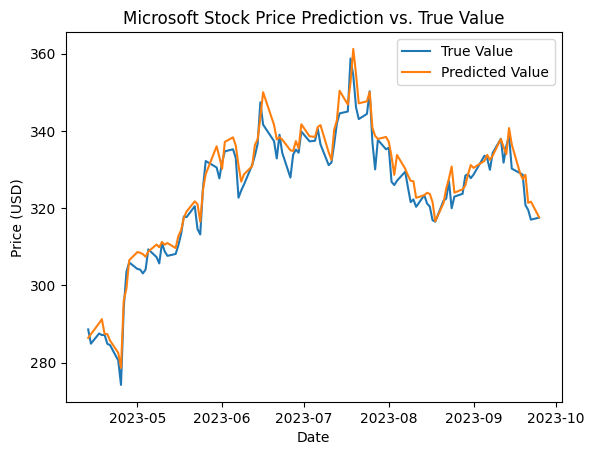

In [12]:
plt.plot(df.iloc[test_index]['Date'], Y_test, label='True Value')
plt.plot(df.iloc[test_index]['Date'], Y_pred, label='Predicted Value')
plt.title('Microsoft Stock Price Prediction vs. True Value')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()